In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from librosa import display
import os
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


<ipython-input-4-e2d91ad21a0c>:13: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])


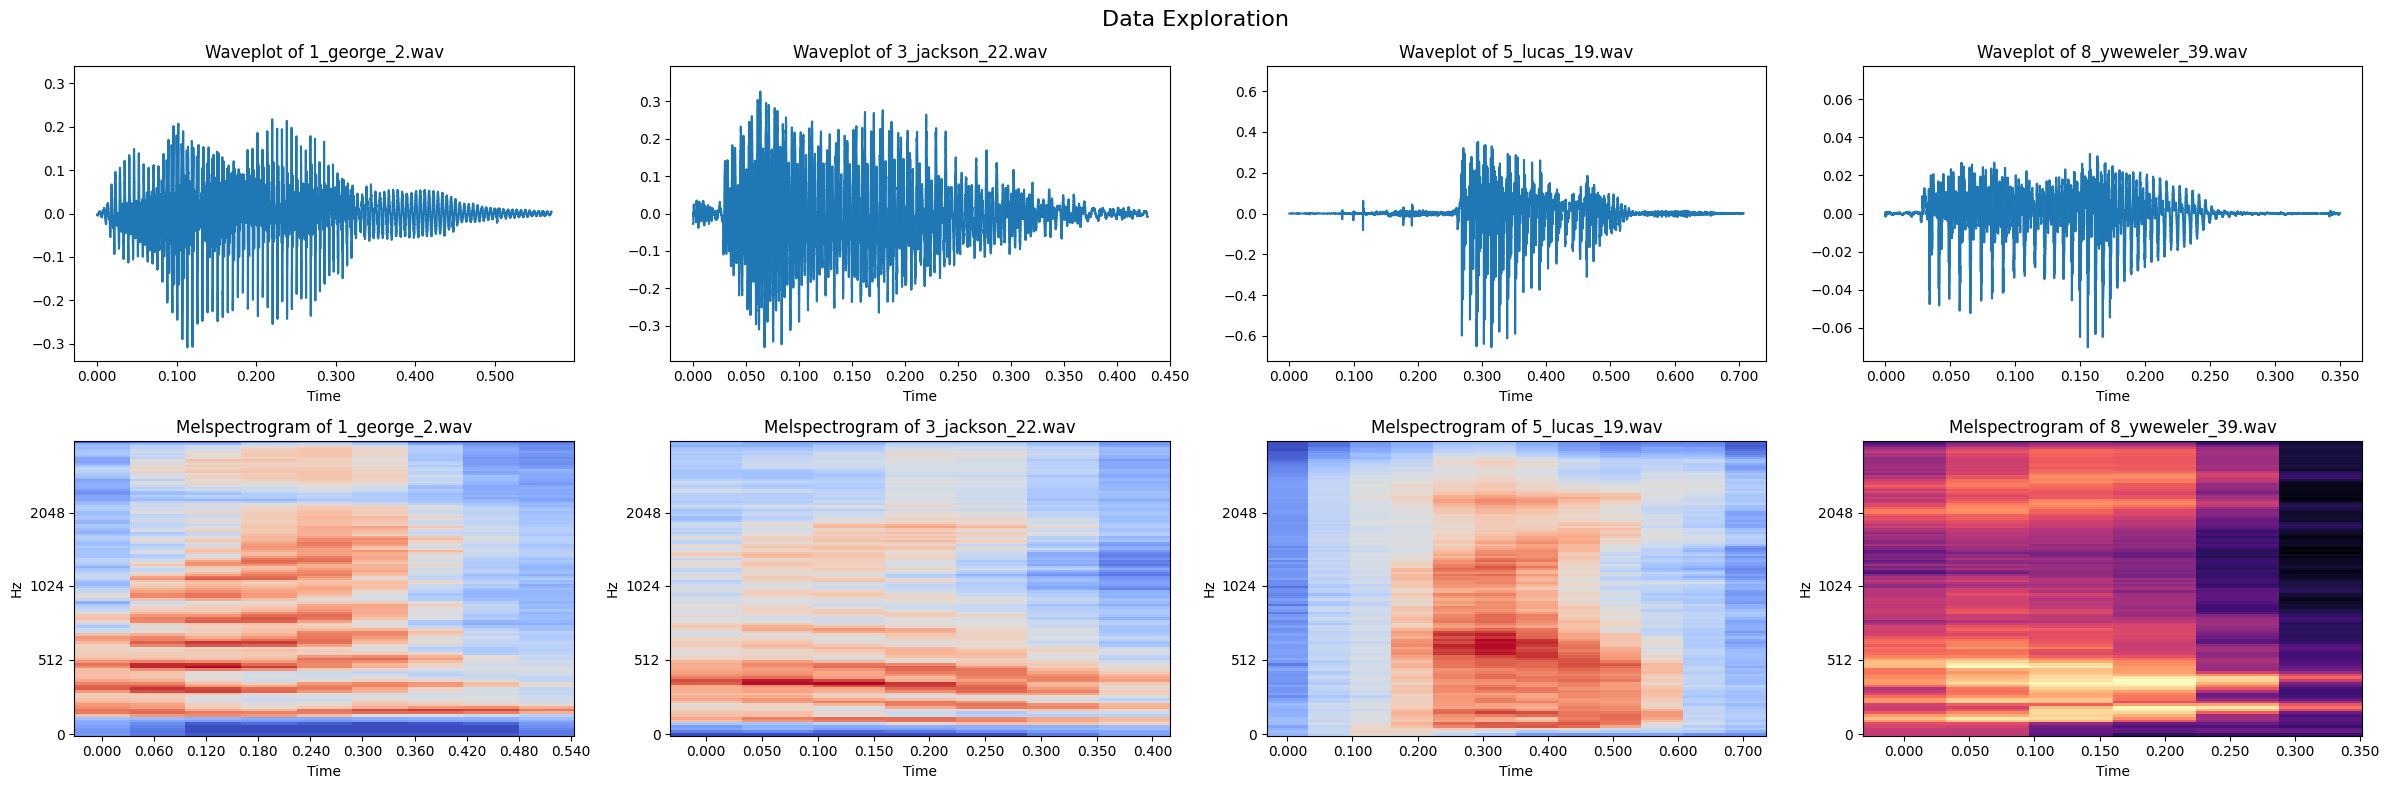

In [ ]:
visualize_digits = [1, 3, 5, 8]

description = pd.read_csv('/content/drive/MyDrive/PROJECT/rec/train.csv')
fig, axs = plt.subplots(nrows=2, ncols=(len(visualize_digits)))
axs = axs.flatten()
fig.suptitle('Data Exploration', fontsize=16)
fig.set_size_inches(24, 8)
for i, digit in enumerate(visualize_digits):
    # Select random file for selected digit
    rand_file = np.random.choice(description[description['label'] == digit]['file_name'])
    # Load audio and plot waveform and melspectrogram
    audio, sr = librosa.load(os.path.join('/content/drive/MyDrive/PROJECT/rec/recordings', rand_file), sr=None)
    librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])
    axs[i].set(title=f'Waveplot of {rand_file}')
    mels_db = librosa.power_to_db(S=librosa.feature.melspectrogram(y=audio, sr=sr), ref=1.0)
    librosa.display.specshow(data=mels_db, sr=sr, x_axis='time', y_axis='mel', ax=axs[i+len(visualize_digits)])
    axs[i+len(visualize_digits)].set(title=f'Melspectrogram of {rand_file}')
plt.tight_layout()
plt.show()

In [ ]:
feature_list = []
label_list = []
# Iterate over all files in given source path
print('Preparing feature dataset and labels.')
for file in tqdm(os.listdir('/content/drive/MyDrive/PROJECT/rec/recordings')):
    # Skip if it's not a wav file
    if not file.endswith('.wav'):
        continue
    # Load audio and stretch it to length 1s
    audio_path = os.path.join('/content/drive/MyDrive/PROJECT/rec/recordings', file)
    audio, sr = librosa.load(path=audio_path, sr=None)
    audio = librosa.effects.time_stretch(y=audio, rate=len(audio)/sr)
    # Calculate features and get the label from the filename
    mels = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
    mels_db = librosa.power_to_db(S=mels, ref=1.0)
    feature_list.append(mels_db.reshape((128, 16, 1)))
    label_list.append(file[0])
features = np.array(feature_list)
labels = np.array(label_list)

Preparing feature dataset and labels.


100%|██████████| 3020/3020 [02:32<00:00, 19.78it/s]


In [ ]:
TEST_SIZE = 0.3
# Assuming features is a 2D array with shape (number_of_samples, number_of_features)
# Flatten the spectrogram data
X_flat = features.reshape(features.shape[0], -1)

# Split dataset to train and test data
X_train, X_test, _, _ = train_test_split(X_flat, labels, test_size=TEST_SIZE, random_state=42)

# Initialize and train the GMM model
gmm_model = GaussianMixture(n_components=10, random_state=42)
gmm_model.fit(X_train)

# Make predictions on the test set
y_pred = gmm_model.predict(X_test)

Epoch 1/10 - Log-Likelihood: 9902.49
Epoch 2/10 - Log-Likelihood: 9902.49
Epoch 3/10 - Log-Likelihood: 9902.49
Epoch 4/10 - Log-Likelihood: 9902.49
Epoch 5/10 - Log-Likelihood: 9902.49
Epoch 6/10 - Log-Likelihood: 9902.49
Epoch 7/10 - Log-Likelihood: 9902.49
Epoch 8/10 - Log-Likelihood: 9902.49
Epoch 9/10 - Log-Likelihood: 9902.49
Epoch 10/10 - Log-Likelihood: 9902.49


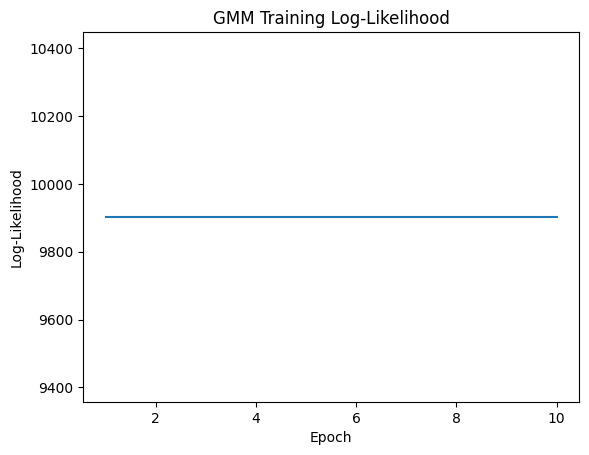

In [ ]:
import matplotlib.pyplot as plt
TEST_SIZE = 0.3
BATCH_SIZE = 64
EPOCHS = 10
# Initialize and train the GMM model
gmm_model = GaussianMixture(n_components=10, random_state=42)
log_likelihoods = []

for epoch in range(EPOCHS):
    gmm_model.fit(X_train)

    # Calculate the log-likelihood and store it
    log_likelihood = gmm_model.score(X_train)
    log_likelihoods.append(log_likelihood)

    print(f'Epoch {epoch + 1}/{EPOCHS} - Log-Likelihood: {log_likelihood:.2f}')

# Plot the log-likelihood over epochs
plt.plot(range(1, EPOCHS + 1), log_likelihoods)
plt.title('GMM Training Log-Likelihood')
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.show()


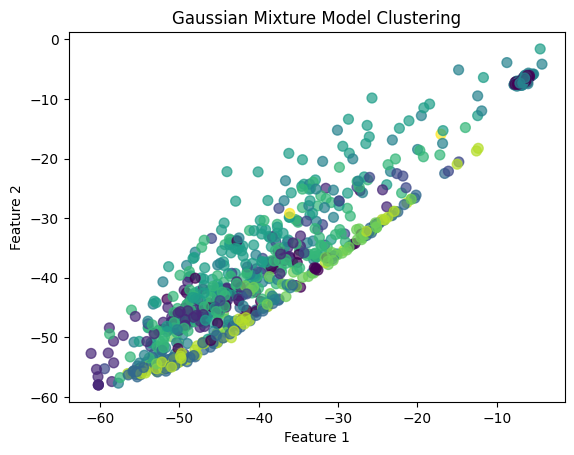

In [ ]:
# Plot the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()